In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

In [3]:
TRAIN_DATA_PATH = './data/train'

In [4]:
train_df = pd.read_csv(os.path.join(TRAIN_DATA_PATH, 'train_ratings.csv'))
year_df = pd.read_csv(os.path.join(TRAIN_DATA_PATH, 'years.tsv'), sep='\t')
writer_df = pd.read_csv(os.path.join(TRAIN_DATA_PATH, 'writers.tsv'), sep='\t')
title_df = pd.read_csv(os.path.join(TRAIN_DATA_PATH, 'titles.tsv'), sep='\t')
genre_df = pd.read_csv(os.path.join(TRAIN_DATA_PATH, 'genres.tsv'), sep='\t')
director_df = pd.read_csv(os.path.join(TRAIN_DATA_PATH, 'directors.tsv'), sep='\t')

# 1. 장르(Genre) 분포

- 전체 영화의 장르가 어떻게 분포가 되어있는가?
- 특정 시기에 많이 개봉된 장르가 있는가?
- 특정 시기에 많이 본 장르가 있는가?

총 장르의 수 : 18


Text(0.5, 1.0, 'Genre distribution over all trainig data')

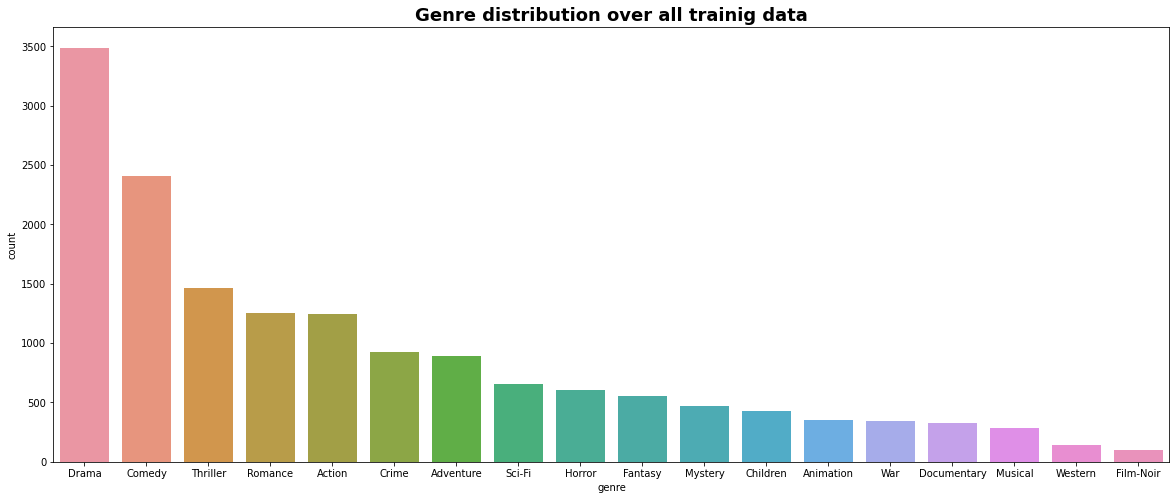

In [46]:
total_genre = genre_df['genre'].unique()
print ("총 장르의 수 :", len(total_genre))

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(x="genre", data=genre_df, ax=ax, order=genre_df['genre'].value_counts().index)
ax.set_title("Genre distribution over all trainig data", fontweight="semibold", fontsize="18")

# 2. 감독과 장르의 상관관계

categorical 변수이기 때문에 상관계수를 구하는 것은 어렵다.  
그렇기 때문에 감독 약 10명을 대상으로 주로 어떤 장르의 영화를 만드는지 살펴보았다.
- 한 명의 감독이 단 하나의 장르만을 만드는 것은 아니다.
- 특정 장르를 많이 만드는 감독들이 있다.

In [16]:
director_genre_df = pd.merge(director_df[:120], genre_df, left_on="item", right_on="item", how='inner')

# 장르를 다시 라벨링
unique_genre_id = director_genre_df['genre'].unique()
genreId_to_uniq_number = dict((genreId, i) for (i, genreId) in enumerate(unique_genre_id))
director_genre_df['genre'] = director_genre_df['genre'].apply(lambda x : genreId_to_uniq_number[x])

# 감독을 다시 라벨링
unique_director_id = director_genre_df['director'].unique()
directorId_to_uniq_number = dict((directorId, i) for (i, directorId) in enumerate(unique_director_id))
director_genre_df['director'] = director_genre_df['director'].apply(lambda x : directorId_to_uniq_number[x])

# 카테고리 변수에 대해 상관계수 분석을 위해 "Cramer's V" correlation 사용
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in director_genre_df:
  col = []
  for var2 in director_genre_df:
    cramers =cramers_V(director_genre_df[var1], director_genre_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = director_genre_df.columns, index =director_genre_df.columns)

df

,item,director,genre
item,1.00,1.00,0.43
director,1.00,1.00,0.18
genre,0.43,0.18,1.00


# 3. 유저가 시청한것 중 인기있는 장르

<AxesSubplot:xlabel='genre', ylabel='count'>

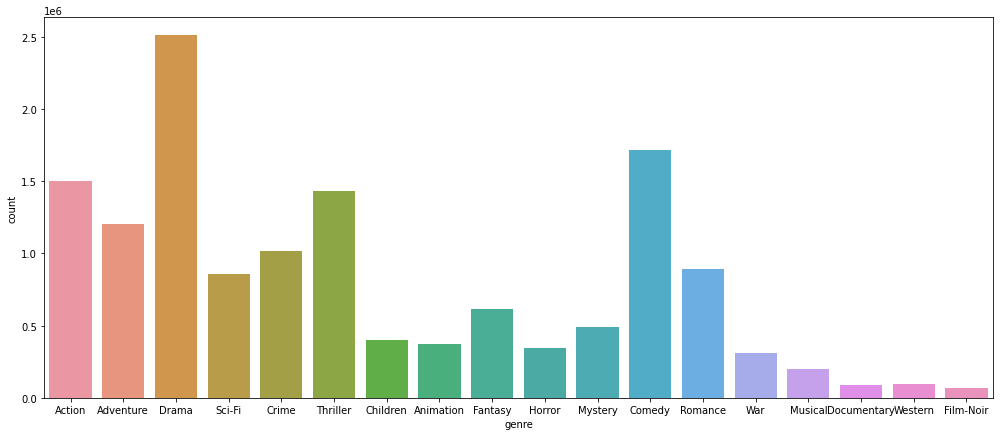

In [84]:
user_genre_df = pd.merge(train_df, genre_df, left_on="item", right_on="item", how="inner")
user_genre_df["genre"].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
sns.countplot(x="genre", data=user_genre_df, ax=ax)

# 4. 유저가 시청한 것 중, 인기있는 감독

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

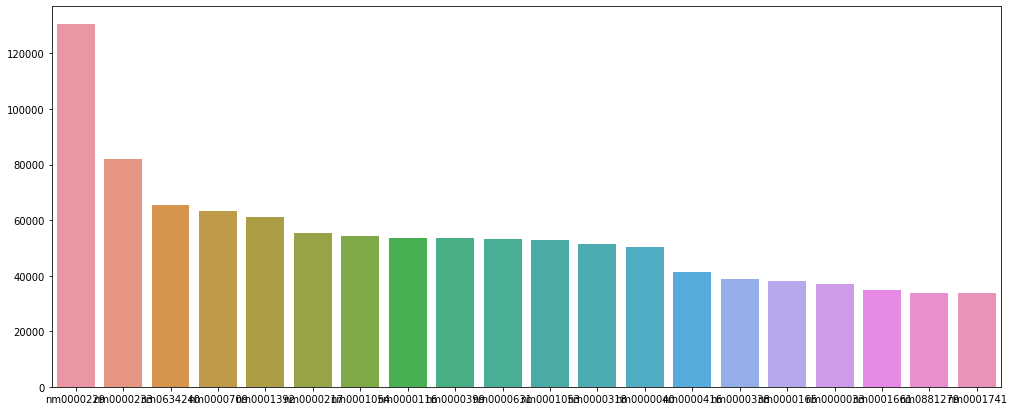

In [102]:
user_director_df = pd.merge(train_df, director_df, left_on="item", right_on="item", how="inner")
user_director_top20 = user_director_df["director"].value_counts()[:20]

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
sns.barplot(user_director_top20.index, user_director_top20.values)

# 5. 유저가 시청한 것 중, 인기있는 각본가

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

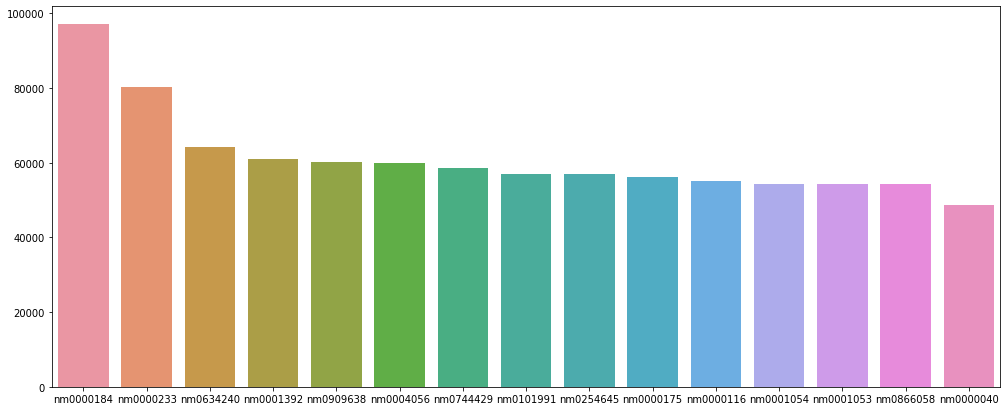

In [105]:
user_writer_df = pd.merge(train_df, writer_df, left_on="item", right_on="item", how="inner")
user_wirter_top15 = user_writer_df["writer"].value_counts()[:15]

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
sns.barplot(user_wirter_top15.index, user_wirter_top15.values)